# Pandas 10분 완성

*역자 주 : 원문은 [링크](https://pandas.pydata.org/pandas-docs/stable/10min.html)를 참조하세요.*

이 소개서는 주로 신규 사용자를 대상으로 한 판다스에 대한 간략한 소개입니다. 더 복잡한 방법은 [Cookbook](https://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook) 에서 볼 수 있습니다.


일반적으로 다음과 같이 불러옵니다.

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

## Object Creation (객체 생성)

[데이터 구조 소개 섹션](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro)을 참조하세요.

pandas는 값을 가지고 있는 리스트를 통해 [시리즈](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html#pandas.Series)를 만들고, 정수로 만들어진 인덱스를 기본값으로 불러올 것입니다.

In [4]:
s = pd.Series([1,3,5,np.nan,6,8])

In [5]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

datetime 인덱스와 레이블이 있는 열을 가지고 있는 NumPy 배열을 전달하여 데이터프레임을 만듭니다.

In [6]:
dates = pd.date_range('20130101', periods=6)

In [7]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [9]:
df

,A,B,C,D
2013-01-01,1.072056,0.676612,0.190707,-0.106271
2013-01-02,-1.347269,-1.948308,-0.542869,0.411718
2013-01-03,-0.196870,-1.043814,-2.912603,0.216540
2013-01-04,0.336644,0.428977,0.136755,0.129543
2013-01-05,-0.459113,1.272854,0.684824,-0.001784
2013-01-06,-0.864858,0.169408,0.557564,2.094632


시리즈와 같은 것으로 변환될 수 있는 객체들의 dict로 구성된 데이터프레임을 만듭니다.

In [10]:
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })

In [11]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


데이터프레임 결과물의 열은 다양한 데이터 타입(dtypes)으로 구성됩니다.

In [12]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

IPython을 이용하고 계시다면, (공용 속성을 포함한) 열 이름에 대한 Tap 자동완성 기능이 자동으로 활성화됩니다. <br>
다음은 완성될 속성에 대한 부분집합(subset)입니다. 

*역자 주 : 하기 코드의 경우, IPython이 아닌 환경(Google Colaboratory, Jupyter 등)에서는 사용이 불가능한 코드인 점에 주의하세요.*

In [13]:
# df2.<TAB>

*역자 주 : IPython에서 실행하면 다음과 같은 결과값이 나옵니다.*

```
df2.A                  df2.bool
df2.abs                df2.boxplot
df2.add                df2.C
df2.add_prefix         df2.clip
df2.add_suffix         df2.clip_lower
df2.align              df2.clip_upper
df2.all                df2.columns
df2.any                df2.combine
df2.append             df2.combine_first
df2.apply              df2.compound
df2.applymap           df2.consolidate
df2.D
```

보시다시피, A, B, C 그리고 D 열이 Tab 자동완성 기능으로 실행됩니다. 물론 E도 있습니다. 나머지 속성들은 간결하게 잘라버렸습니다. 

## Viewing Data(데이터 확인하기)

[Basic Section](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics)을 참조하세요.

데이터프레임의 가장 윗 줄과 마지막 줄을 확인하고 싶을 때에 사용하는 방법은 다음과 같습니다. <br>

*역자 주 <br>
괄호()안에는 숫자가 들어갈 수도 있고 안 들어갈 수도 있습니다. <br>
숫자가 들어간다면, 윗/마지막 줄의 특정 줄을 불러올 수 있습니다. <br>
숫자가 들어가지 않다면, 기본값인 5로 처리됩니다.*

*예시 <br>
df.tail(3) - 끝에서 마지막 3줄을 불러옴 <br>
df.tail() - 끝에서 마지막 5줄 불러옴*

In [14]:
df.head()

,A,B,C,D
2013-01-01,1.072056,0.676612,0.190707,-0.106271
2013-01-02,-1.347269,-1.948308,-0.542869,0.411718
2013-01-03,-0.196870,-1.043814,-2.912603,0.216540
2013-01-04,0.336644,0.428977,0.136755,0.129543
2013-01-05,-0.459113,1.272854,0.684824,-0.001784


In [15]:
df.tail(3)

,A,B,C,D
2013-01-04,0.336644,0.428977,0.136755,0.129543
2013-01-05,-0.459113,1.272854,0.684824,-0.001784
2013-01-06,-0.864858,0.169408,0.557564,2.094632


인덱스(Index), 열(Column) 그리고 NumPy 데이터에 대한 세부 정보를 봅니다.

In [16]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [17]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [18]:
df.values

array([[ 1.07205612e+00,  6.76612120e-01,  1.90707282e-01,
        -1.06270883e-01],
       [-1.34726877e+00, -1.94830834e+00, -5.42869055e-01,
         4.11717564e-01],
       [-1.96870190e-01, -1.04381418e+00, -2.91260255e+00,
         2.16540485e-01],
       [ 3.36644416e-01,  4.28976864e-01,  1.36755039e-01,
         1.29542535e-01],
       [-4.59112754e-01,  1.27285363e+00,  6.84824135e-01,
        -1.78393547e-03],
       [-8.64857657e-01,  1.69407877e-01,  5.57563817e-01,
         2.09463211e+00]])

[describe()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html#pandas.DataFrame.describe)는 데이터의 대략적인 통계적 정보 요약을 보여줍니다.

In [19]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.243235,-0.074045,-0.314270,0.457396
std,0.862590,1.195260,1.343153,0.821790
min,-1.347269,-1.948308,-2.912603,-0.106271
25%,-0.763421,-0.740509,-0.372963,0.031048
50%,-0.327991,0.299192,0.163731,0.173042
75%,0.203266,0.614703,0.465850,0.362923
max,1.072056,1.272854,0.684824,2.094632


데이터를 전치합니다.

In [20]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,1.072056,-1.347269,-0.196870,0.336644,-0.459113,-0.864858
B,0.676612,-1.948308,-1.043814,0.428977,1.272854,0.169408
C,0.190707,-0.542869,-2.912603,0.136755,0.684824,0.557564
D,-0.106271,0.411718,0.216540,0.129543,-0.001784,2.094632


축 별로 정렬합니다.

In [21]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.106271,0.190707,0.676612,1.072056
2013-01-02,0.411718,-0.542869,-1.948308,-1.347269
2013-01-03,0.216540,-2.912603,-1.043814,-0.196870
2013-01-04,0.129543,0.136755,0.428977,0.336644
2013-01-05,-0.001784,0.684824,1.272854,-0.459113
2013-01-06,2.094632,0.557564,0.169408,-0.864858


값 별로 정렬합니다.

In [22]:
df.sort_values(by='B')

,A,B,C,D
2013-01-02,-1.347269,-1.948308,-0.542869,0.411718
2013-01-03,-0.196870,-1.043814,-2.912603,0.216540
2013-01-06,-0.864858,0.169408,0.557564,2.094632
2013-01-04,0.336644,0.428977,0.136755,0.129543
2013-01-01,1.072056,0.676612,0.190707,-0.106271
2013-01-05,-0.459113,1.272854,0.684824,-0.001784


## Selection (선택)

주석(Note) : 선택과 설정을 위한 Python / Numpy의 표준화된 표현들이 직관적이며, 코드 작성을 위한 양방향 작업에 유용하지만 우리는 Pandas에 최적화된 데이터 접근 방법인 .at, .iat, .loc 및 .iloc 을 추천합니다. 

[데이터 인덱싱 및 선택](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) 문서와 [다중 인덱싱 / 심화 인덱싱](https://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced) 문서를 참조하세요.

### Getting (데이터 얻기)

df.A 와 동일한 Series를 생성하는 단일 열을 선택합니다.

In [23]:
df['A']

2013-01-01    1.072056
2013-01-02   -1.347269
2013-01-03   -0.196870
2013-01-04    0.336644
2013-01-05   -0.459113
2013-01-06   -0.864858
Freq: D, Name: A, dtype: float64

행을 분할하는 []를 통해 선택합니다.

In [24]:
df[0:3]

,A,B,C,D
2013-01-01,1.072056,0.676612,0.190707,-0.106271
2013-01-02,-1.347269,-1.948308,-0.542869,0.411718
2013-01-03,-0.196870,-1.043814,-2.912603,0.216540


In [25]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-1.347269,-1.948308,-0.542869,0.411718
2013-01-03,-0.196870,-1.043814,-2.912603,0.216540
2013-01-04,0.336644,0.428977,0.136755,0.129543


### Selection by Label (Label 을 통한 선택)

[Label을 통한 선택](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-label)에서 더 많은 내용을 확인하세요.

라벨을 사용하여 횡단면을 얻습니다.

In [26]:
df.loc[dates[0]]

A    1.072056
B    0.676612
C    0.190707
D   -0.106271
Name: 2013-01-01 00:00:00, dtype: float64

라벨을 사용하여 여러 축(의 데이터)을 얻습니다.

In [27]:
df.loc[:,['A','B']]

,A,B
2013-01-01,1.072056,0.676612
2013-01-02,-1.347269,-1.948308
2013-01-03,-0.196870,-1.043814
2013-01-04,0.336644,0.428977
2013-01-05,-0.459113,1.272854
2013-01-06,-0.864858,0.169408


양쪽 종단점을 포함한 라벨 슬라이싱을 봅니다.

In [28]:
df.loc['20130102':'20130104', ['A','B']]

,A,B
2013-01-02,-1.347269,-1.948308
2013-01-03,-0.196870,-1.043814
2013-01-04,0.336644,0.428977


반환되는 객체의 크기를 줄입니다.

In [29]:
df.loc['20130102',['A','B']]

A   -1.347269
B   -1.948308
Name: 2013-01-02 00:00:00, dtype: float64

스칼라 값을 얻습니다.

In [30]:
df.loc[dates[0],'A']

1.072056120039088

스칼라 값을 더 빠르게 구하는 방법입니다. (앞선 메소드와 동일합니다.)

In [31]:
df.at[dates[0],'A']

1.072056120039088

### Selection by Position (위치로 선택하기)

자세한 내용은 [위치로 선택하기](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer)를 참고해주세요.

넘겨받은 정수의 위치를 기준으로 선택합니다.

In [32]:
df.iloc[3]

A    0.336644
B    0.428977
C    0.136755
D    0.129543
Name: 2013-01-04 00:00:00, dtype: float64

정수(로 표기된) 슬라이스들을 통해, numpy/python과 유사하게 작동합니다.

In [33]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.336644,0.428977
2013-01-05,-0.459113,1.272854


정수(로 표기된) 위치값의 리스트들을 통해, numpy/python의 스타일과 유사해집니다.

In [34]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-1.347269,-0.542869
2013-01-03,-0.196870,-2.912603
2013-01-05,-0.459113,0.684824


명시적으로 행을 나누고자 하는 경우입니다.

In [35]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-1.347269,-1.948308,-0.542869,0.411718
2013-01-03,-0.196870,-1.043814,-2.912603,0.216540


명시적으로 열을 나누고자 하는 경우입니다.

In [36]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.676612,0.190707
2013-01-02,-1.948308,-0.542869
2013-01-03,-1.043814,-2.912603
2013-01-04,0.428977,0.136755
2013-01-05,1.272854,0.684824
2013-01-06,0.169408,0.557564


명시적으로 (특정한) 값을 얻고자 하는 경우입니다.

In [37]:
df.iloc[1,1]

-1.948308335452539

스칼라 값을 빠르게 얻는 방법입니다. (위의 방식과 동일합니다.)

In [38]:
df.iat[1,1]

-1.948308335452539

### Boolean Indexing

데이터를 선택하기 위해 단일 열의 값을 사용합니다.

In [39]:
df[df.A > 0]

,A,B,C,D
2013-01-01,1.072056,0.676612,0.190707,-0.106271
2013-01-04,0.336644,0.428977,0.136755,0.129543


Boolean 조건을 충족하는 데이터프레임에서 값을 선택합니다.

In [40]:
df[df > 0]

,A,B,C,D
2013-01-01,1.072056,0.676612,0.190707,NaN
2013-01-02,NaN,NaN,NaN,0.411718
2013-01-03,NaN,NaN,NaN,0.216540
2013-01-04,0.336644,0.428977,0.136755,0.129543
2013-01-05,NaN,1.272854,0.684824,NaN
2013-01-06,NaN,0.169408,0.557564,2.094632


필터링을 위한 메소드 [isin()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.isin.html#pandas.Series.isin)을 사용합니다.

In [41]:
df2 = df.copy()

In [42]:
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']

In [43]:
df2

,A,B,C,D,E
2013-01-01,1.072056,0.676612,0.190707,-0.106271,one
2013-01-02,-1.347269,-1.948308,-0.542869,0.411718,one
2013-01-03,-0.196870,-1.043814,-2.912603,0.216540,two
2013-01-04,0.336644,0.428977,0.136755,0.129543,three
2013-01-05,-0.459113,1.272854,0.684824,-0.001784,four
2013-01-06,-0.864858,0.169408,0.557564,2.094632,three


In [44]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-0.196870,-1.043814,-2.912603,0.216540,two
2013-01-05,-0.459113,1.272854,0.684824,-0.001784,four


### Setting (설정)

인덱스에 의해 (생성된) 데이터가 새로운 열에서 자동으로 정렬되도록 설정합니다.

In [45]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))

In [46]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [47]:
df['F'] = s1

라벨에 의해 값을 설정합니다.

In [48]:
df.at[dates[0],'A'] = 0

위치에 의해 값을 설정합니다.

In [49]:
df.iat[0,1] = 0

NumPy 배열을 사용한 할당에 의해 값을 설정합니다.

In [50]:
df.loc[:,'D'] = np.array([5] * len(df))

위 설정대로 작동한 결과입니다.

In [51]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.190707,5,NaN
2013-01-02,-1.347269,-1.948308,-0.542869,5,1.0
2013-01-03,-0.196870,-1.043814,-2.912603,5,2.0
2013-01-04,0.336644,0.428977,0.136755,5,3.0
2013-01-05,-0.459113,1.272854,0.684824,5,4.0
2013-01-06,-0.864858,0.169408,0.557564,5,5.0


상기의 설정을 적용한 연산입니다.

In [52]:
df2 = df.copy()

In [53]:
df2[df2 > 0] = -df2

In [54]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.190707,-5,NaN
2013-01-02,-1.347269,-1.948308,-0.542869,-5,-1.0
2013-01-03,-0.196870,-1.043814,-2.912603,-5,-2.0
2013-01-04,-0.336644,-0.428977,-0.136755,-5,-3.0
2013-01-05,-0.459113,-1.272854,-0.684824,-5,-4.0
2013-01-06,-0.864858,-0.169408,-0.557564,-5,-5.0


## Missing Data (결측치)

pandas는 결측치를 표현하기 위해 주로 np.nan 값을 사용합니다. 이 방법은 기본 설정값이지만 계산에는 포함되지 않습니다. <br>
[Missing Data section](https://pandas.pydata.org/pandas-docs/stable/missing_data.html#missing-data)를 참조하세요.

Reindexing으로 지정된 축 상의 인덱스를 변경/추가/삭제할 수 있습니다. Reindexing은 데이터의 복사본을 반환합니다.

In [55]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [56]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [57]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.190707,5,NaN,1.0
2013-01-02,-1.347269,-1.948308,-0.542869,5,1.0,1.0
2013-01-03,-0.196870,-1.043814,-2.912603,5,2.0,NaN
2013-01-04,0.336644,0.428977,0.136755,5,3.0,NaN


결측치를 가지고 있는 행들을 지웁니다.

In [58]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-1.347269,-1.948308,-0.542869,5,1.0,1.0


결측치를 채워 넣습니다.

In [59]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.190707,5,5.0,1.0
2013-01-02,-1.347269,-1.948308,-0.542869,5,1.0,1.0
2013-01-03,-0.196870,-1.043814,-2.912603,5,2.0,5.0
2013-01-04,0.336644,0.428977,0.136755,5,3.0,5.0


nan인 값에 Boolean(을 통한) 표식을 얻습니다.

*역자 주 : 데이터프레임의 모든 값이 Boolean 형태로 표시되도록 하며, nan인 값에만 True가 표시되게 하는 함수입니다.*

In [60]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operation (연산)

[바이너리 연산의 기본 섹션](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop)을 참조하세요.

### Stats (통계)

일반적으로 결측치를 제외한 후 연산됩니다.

서술적인 통계를 수행합니다.

In [61]:
df.mean()

A   -0.421911
B   -0.186814
C   -0.314270
D    5.000000
F    3.000000
dtype: float64

다른 축에서 동일한 연산을 수행합니다.

In [62]:
df.mean(1)

2013-01-01    1.297677
2013-01-02    0.432311
2013-01-03    0.569343
2013-01-04    1.780475
2013-01-05    2.099713
2013-01-06    1.972423
Freq: D, dtype: float64

정렬이 필요하며, 차원이 다른 객체로 연산해보겠습니다. 또한, pandas는 지정된 차원을 따라 자동으로 브로드 캐스팅됩니다.

*역자 주 : broadcast란 numpy에서 유래한 용어로, n차원이나 스칼라 값으로 연산을 수행할 때 도출되는 결과의 규칙을 설명하는 것을 의미합니다.*

In [63]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [64]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [65]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.196870,-2.043814,-3.912603,4.0,1.0
2013-01-04,-2.663356,-2.571023,-2.863245,2.0,0.0
2013-01-05,-5.459113,-3.727146,-4.315176,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply (적용)

데이터에 함수를 적용합니다.

In [66]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.190707,5,NaN
2013-01-02,-1.347269,-1.948308,-0.352162,10,1.0
2013-01-03,-1.544139,-2.992123,-3.264764,15,3.0
2013-01-04,-1.207495,-2.563146,-3.128009,20,6.0
2013-01-05,-1.666607,-1.290292,-2.443185,25,10.0
2013-01-06,-2.531465,-1.120884,-1.885621,30,15.0


In [67]:
df.apply(lambda x: x.max() - x.min())

A    1.683913
B    3.221162
C    3.597427
D    0.000000
F    4.000000
dtype: float64

### Histogramming (히스토그래밍)

더 많은 내용은 [Histogramming and Discretization (히스토그래밍과 이산화)](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization) 항목을 참조하세요.

In [68]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [69]:
s

0    1
1    6
2    4
3    1
4    2
5    1
6    6
7    2
8    3
9    4
dtype: int32

In [70]:
s.value_counts()

1    3
6    2
4    2
2    2
3    1
dtype: int64

### String Methods (문자열 메소드)

Series는 다음의 코드와 같이 문자열 처리 메소드 모음(set)을 가지고 있습니다. <br>
이 모음은 배열의 각 요소를 쉽게 조작할 수 있도록 만들어주는 문자열의 속성에 포함되어 있습니다.

문자열의 패턴 일치 확인은 기본적으로 정규 표현식을 사용하며, 몇몇 경우에는 항상 정규 표현식을 사용함에 유의하십시오.

좀 더 자세한 내용은 [벡터화된 문자열 메소드](https://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods) 부분에서 확인할 수 있습니다.

In [71]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [72]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge (병합)

### Concat (연결)

결합(join) / 병합(merge) 형태의 연산에 대한 인덱스, 관계 대수 기능을 위한 다양한 형태의 논리를 포함한 Series, 데이터프레임, Panel 객체를 손쉽게 결합할 수 있도록 하는 다양한 기능을 pandas 에서 제공합니다. 

[Merging](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) 부분을 참조하세요. 

[concat()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html#pandas.concat)으로 pandas 객체를 연결합니다. 

In [73]:
df = pd.DataFrame(np.random.randn(10, 4))

In [74]:
df

,0,1,2,3
0,-1.321474,1.074708,1.427600,1.491163
1,-0.232848,1.260216,0.166628,0.370862
2,-0.815331,2.728043,-1.074541,-0.221238
3,-0.544755,0.265997,-1.668469,-2.160295
4,-0.583682,-0.225389,0.607618,-0.323225
5,0.972730,1.370034,0.099637,-0.455284
6,-0.256677,-1.451318,0.170217,1.526520
7,-0.916983,-0.215252,-0.593453,-1.259574
8,-1.551022,-0.679342,-1.513099,-0.889067
9,-0.366858,0.121702,-0.999330,-0.633938


In [75]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [76]:
pd.concat(pieces)

,0,1,2,3
0,-1.321474,1.074708,1.427600,1.491163
1,-0.232848,1.260216,0.166628,0.370862
2,-0.815331,2.728043,-1.074541,-0.221238
3,-0.544755,0.265997,-1.668469,-2.160295
4,-0.583682,-0.225389,0.607618,-0.323225
5,0.972730,1.370034,0.099637,-0.455284
6,-0.256677,-1.451318,0.170217,1.526520
7,-0.916983,-0.215252,-0.593453,-1.259574
8,-1.551022,-0.679342,-1.513099,-0.889067
9,-0.366858,0.121702,-0.999330,-0.633938


### Join (결합)

SQL 방식으로 병합합니다. [데이터베이스 스타일 결합](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join) 부분을 참고하세요.

In [77]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [78]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [79]:
left

,key,lval
0,foo,1
1,foo,2


In [80]:
right

,key,rval
0,foo,4
1,foo,5


In [81]:
pd.merge(left, right, on= 'key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


다른 예시입니다.

In [82]:
left = pd.DataFrame({'key' : ['foo', 'bar'], 'lval' : [1, 2]})

In [83]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [84]:
left

,key,lval
0,foo,1
1,bar,2


In [85]:
right 

,key,rval
0,foo,4
1,bar,5


In [86]:
pd.merge(left, right, on= 'key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Append (추가)

데이터프레임에 행을 추가합니다. [Appending](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation) 부분을 참조하세요.

In [87]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])

In [88]:
df

,A,B,C,D
0,-0.789914,1.278723,1.038071,1.670630
1,2.243766,-0.311935,-0.679068,0.283738
2,-1.141781,-0.074785,-1.709231,-0.908113
3,-1.566162,0.821652,-0.196202,1.366636
4,-0.419881,-1.120399,-0.738392,1.113420
5,-0.032739,-2.330941,1.266470,0.623114
6,0.215986,2.463010,0.312977,-0.174133
7,0.903627,-0.925321,0.061968,-0.942534


In [89]:
s = df.iloc[3]

In [90]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.789914,1.278723,1.038071,1.670630
1,2.243766,-0.311935,-0.679068,0.283738
2,-1.141781,-0.074785,-1.709231,-0.908113
3,-1.566162,0.821652,-0.196202,1.366636
4,-0.419881,-1.120399,-0.738392,1.113420
5,-0.032739,-2.330941,1.266470,0.623114
6,0.215986,2.463010,0.312977,-0.174133
7,0.903627,-0.925321,0.061968,-0.942534
8,-1.566162,0.821652,-0.196202,1.366636


## Grouping (그룹화)

**그룹화**는 다음 단계 중 하나 이상을 포함하는 과정을 가리킵니다.

- 몇몇 기준에 따라 여러 그룹으로 데이터를 **분할(Splitting)**
- 각 그룹에 독립적으로 함수를 **적용(Applying)**
- 결과물들을 하나의 데이터 구조로  **결합(Combining)**

자세한 내용은 [그룹화](https://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby) 부분을 참조하세요.

In [91]:
df = pd.DataFrame(
    {
        'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
        'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
        'C' : np.random.randn(8),
        'D' : np.random.randn(8)
    })

In [92]:
df

,A,B,C,D
0,foo,one,-1.010580,0.158798
1,bar,one,-0.511787,-0.558484
2,foo,two,-0.633765,-1.389369
3,bar,three,-1.114206,-0.871100
4,foo,two,0.325719,0.719644
5,bar,two,-0.530995,-0.845887
6,foo,one,0.470300,-2.990814
7,foo,three,0.805913,1.592019


(생성된 데이터프레임을) 그룹화한 후 각 그룹에 [sum()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html#pandas.DataFrame.sum) 함수를 적용합니다.

In [93]:
df.groupby('A').sum()

,C,D
A,,
bar,-2.156987,-2.275470
foo,-0.042413,-1.909721


여러 열을 기준으로 그룹화하면 계층적 인덱스가 형성됩니다. 여기에도 sum 함수를 적용할 수 있습니다.

In [94]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.511787 -0.558484
    three -1.114206 -0.871100
    two   -0.530995 -0.845887
foo one   -0.540280 -2.832016
    three  0.805913  1.592019
    two   -0.308046 -0.669725

## Reshaping (변형)

[계층적 인덱싱](https://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical) 및 [변형](https://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking) 부분을 참조하세요.

### Stack (스택)

In [95]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

In [96]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [97]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [98]:
df2  =  df[:4]

In [99]:
df2

A         B
first second                    
bar   one     0.376256  0.127798
      two    -0.847776  1.186748
baz   one     0.280129 -0.060967
      two     0.428598 -1.203600

[stack()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html#pandas.DataFrame.stack) 메소드는 데이터프레임 열들의 계층을 "압축"합니다.

In [100]:
stacked = df2.stack()

In [101]:
stacked

first  second   
bar    one     A    0.376256
               B    0.127798
       two     A   -0.847776
               B    1.186748
baz    one     A    0.280129
               B   -0.060967
       two     A    0.428598
               B   -1.203600
dtype: float64

"Stack된" 데이터프레임 또는 (MultiIndex를 인덱스로 사용하는) Series인 경우, [stack()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html#pandas.DataFrame.stack)의 역 연산은 [unstack()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack)이며, 기본적으로 **마지막 계층**을 unstack합니다.

In [102]:
stacked.unstack()

A         B
first second                    
bar   one     0.376256  0.127798
      two    -0.847776  1.186748
baz   one     0.280129 -0.060967
      two     0.428598 -1.203600

In [103]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.376256 -0.847776
      B  0.127798  1.186748
baz   A  0.280129  0.428598
      B -0.060967 -1.203600

In [104]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.376256  0.280129
       B  0.127798 -0.060967
two    A -0.847776  0.428598
       B  1.186748 -1.203600

### Pivot Tables (피벗 테이블)

[피벗 테이블](https://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot) 부분을 참조하세요.

In [105]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})

In [106]:
df

,A,B,C,D,E
0,one,A,foo,1.000355,-0.370895
1,one,B,foo,-0.456949,-0.712004
2,two,C,foo,0.044081,-2.163655
3,three,A,bar,-0.429198,-1.754877
4,one,B,bar,-2.628718,2.172661
5,one,C,bar,0.359570,-0.108175
6,two,A,foo,-2.234256,2.008960
7,three,B,foo,0.361596,-0.415309
8,one,C,foo,-1.343173,0.884657
9,one,A,bar,-0.222807,0.799391


이 데이터로부터 피벗 테이블을 매우 쉽게 생성할 수 있습니다.

In [107]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.222807  1.000355
      B -2.628718 -0.456949
      C  0.359570 -1.343173
three A -0.429198       NaN
      B       NaN  0.361596
      C  1.415912       NaN
two   A       NaN -2.234256
      B  1.163489       NaN
      C       NaN  0.044081

## Time Series (시계열)

pandas는 자주 일어나는 변환(예시 : 5분마다 일어나는 데이터에 대한 2차 데이터 변환) 사이에 수행하는 리샘플링 연산을 위한 간단하고, 강력하며, 효율적인 함수를 제공합니다. 이는 재무(금융) 응용에서 매우 일반적이지만 이에 국한되지 않습니다. [시계열](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries) 부분을 참고하세요.

In [108]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [109]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [110]:
ts.resample('5Min').sum()

2012-01-01    25546
Freq: 5T, dtype: int32

시간대를 표현합니다.

In [111]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [112]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [113]:
ts

2012-03-06    0.968236
2012-03-07    1.583852
2012-03-08    0.086275
2012-03-09    0.395204
2012-03-10   -2.005086
Freq: D, dtype: float64

In [114]:
ts_utc = ts.tz_localize('UTC')

In [115]:
ts_utc

2012-03-06 00:00:00+00:00    0.968236
2012-03-07 00:00:00+00:00    1.583852
2012-03-08 00:00:00+00:00    0.086275
2012-03-09 00:00:00+00:00    0.395204
2012-03-10 00:00:00+00:00   -2.005086
Freq: D, dtype: float64

다른 시간대로 변환합니다.

In [116]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.968236
2012-03-06 19:00:00-05:00    1.583852
2012-03-07 19:00:00-05:00    0.086275
2012-03-08 19:00:00-05:00    0.395204
2012-03-09 19:00:00-05:00   -2.005086
Freq: D, dtype: float64

시간 표현 ↔ 기간 표현으로 변환합니다.

In [117]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [118]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [119]:
ts

2012-01-31    1.869281
2012-02-29   -1.532504
2012-03-31    0.112991
2012-04-30    0.354387
2012-05-31    1.115401
Freq: M, dtype: float64

In [120]:
ps = ts.to_period()

In [121]:
ps

2012-01    1.869281
2012-02   -1.532504
2012-03    0.112991
2012-04    0.354387
2012-05    1.115401
Freq: M, dtype: float64

In [122]:
ps.to_timestamp()

2012-01-01    1.869281
2012-02-01   -1.532504
2012-03-01    0.112991
2012-04-01    0.354387
2012-05-01    1.115401
Freq: MS, dtype: float64

기간 - 시간 변환은 편리한 산술 기능들을 사용할 수 있도록 만들어줍니다. 다음 예제에서, 우리는 11월에 끝나는 연말 결산의 분기별 빈도를 분기말 익월의 월말일 오전 9시로 변환합니다.

In [123]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [124]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [125]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [126]:
ts.head()

1990-03-01 09:00    1.369555
1990-06-01 09:00    0.337276
1990-09-01 09:00    1.397941
1990-12-01 09:00   -0.230863
1991-03-01 09:00   -0.385278
Freq: H, dtype: float64

## Categoricals (범주화)

pandas는 데이터프레임 내에 범주형 데이터를 포함할 수 있습니다. [범주형 소개](https://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) 와 [API 문서](https://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical) 부분을 참조하세요.

In [127]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

가공하지 않은 성적을 범주형 데이터로 변환합니다.

In [128]:
df["grade"] = df["raw_grade"].astype("category")

In [129]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

범주에 더 의미 있는 이름을 붙여주세요. (Series.cat.categories로 할당하는 것이 적합합니다!)

In [130]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

범주의 순서를 바꾸고 동시에 누락된 범주를 추가합니다. (Series.cat에 속하는 메소드는 기본적으로 새로운 Series를 반환합니다.)

In [131]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [132]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

정렬은 사전 순서가 아닌, 해당 범주에서 지정된 순서대로 배열합니다.

*역자 주 : 131번에서 very bad, bad, medium, good, very good 의 순서로 기재되어 있기 때문에 정렬 결과도 해당 순서대로 배열됩니다.*

In [133]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


범주의 열을 기준으로 그룹화하면 빈 범주도 표시됩니다.

In [134]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

[Plotting](https://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) 부분을 참조하세요.

In [135]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [136]:
ts = ts.cumsum()

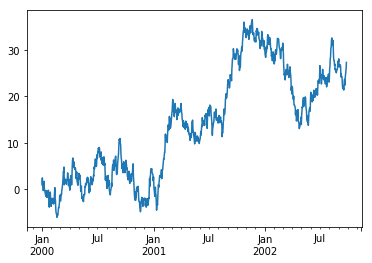

In [137]:
ts.plot()

데이터프레임에서 [plot()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html#pandas.DataFrame.plot) 메소드는 라벨이 존재하는 모든 열을 그릴 때 편리합니다.

In [138]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])  

In [139]:
df = df.cumsum()

<Figure size 432x288 with 0 Axes>

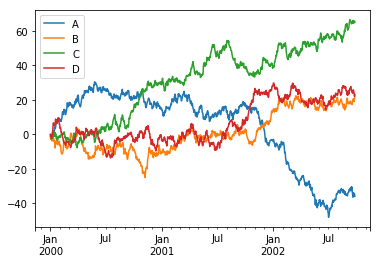

In [140]:
plt.figure(); df.plot(); plt.legend(loc='best')

## Getting Data In/Out (데이터 입/출력)

### CSV

[csv 파일에 씁니다.](https://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [141]:
df.to_csv('foo.csv')

[csv 파일을 읽습니다.](https://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [142]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.504053,-1.077338,-0.053139,-1.051069
1,2000-01-02,-0.846991,-2.918339,-0.077271,-0.196869
2,2000-01-03,-1.342438,-1.860746,-1.860193,-1.511270
3,2000-01-04,-1.156047,-1.856299,-1.988300,-2.606590
4,2000-01-05,-2.391375,-3.182648,-2.136922,-2.149765
5,2000-01-06,-2.042776,-3.940620,-1.079761,-1.890576
6,2000-01-07,-0.095328,-3.517690,-2.456351,-0.764731
7,2000-01-08,1.273206,-2.770742,-1.817641,0.940298
8,2000-01-09,1.775630,-2.020936,-1.799190,2.872706
9,2000-01-10,1.276832,-3.412842,-1.475195,5.840642


### HDF5

[HDFStores](https://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)에 읽고 씁니다.

HDF5 Store에 씁니다.

In [143]:
df.to_hdf('foo.h5','df')

HDF5 Store에서 읽어옵니다.

In [144]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,-0.504053,-1.077338,-0.053139,-1.051069
2000-01-02,-0.846991,-2.918339,-0.077271,-0.196869
2000-01-03,-1.342438,-1.860746,-1.860193,-1.511270
2000-01-04,-1.156047,-1.856299,-1.988300,-2.606590
2000-01-05,-2.391375,-3.182648,-2.136922,-2.149765
2000-01-06,-2.042776,-3.940620,-1.079761,-1.890576
2000-01-07,-0.095328,-3.517690,-2.456351,-0.764731
2000-01-08,1.273206,-2.770742,-1.817641,0.940298
2000-01-09,1.775630,-2.020936,-1.799190,2.872706
2000-01-10,1.276832,-3.412842,-1.475195,5.840642


### Excel
[MS Excel](https://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)에 읽고 씁니다. 

엑셀 파일에 씁니다. 


In [145]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

엑셀 파일을 읽어옵니다.

In [146]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,-0.504053,-1.077338,-0.053139,-1.051069
2000-01-02,-0.846991,-2.918339,-0.077271,-0.196869
2000-01-03,-1.342438,-1.860746,-1.860193,-1.511270
2000-01-04,-1.156047,-1.856299,-1.988300,-2.606590
2000-01-05,-2.391375,-3.182648,-2.136922,-2.149765
2000-01-06,-2.042776,-3.940620,-1.079761,-1.890576
2000-01-07,-0.095328,-3.517690,-2.456351,-0.764731
2000-01-08,1.273206,-2.770742,-1.817641,0.940298
2000-01-09,1.775630,-2.020936,-1.799190,2.872706
2000-01-10,1.276832,-3.412842,-1.475195,5.840642


## Gotchas (들켰지!)

연산을 수행하기 위해 시도하면 다음과 같은 예외 상황을 볼 수도 있습니다.

In [147]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

설명과 무엇을 해야하는지에 대해서는 [비교](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-compare) 부분을 참조하세요.

[Gotchas](https://pandas.pydata.org/pandas-docs/stable/gotchas.html#gotchas) 부분도 참조하세요.

*역자 주 : [판다스 개발자인 웨스 매키니가 PyCon Korea 2016에서 발표했던 Keynote](https://www.youtube.com/watch?v=O5uFF1H0R0M)도 참조하세요.*